# Does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

This project is a bout a particular wondered from the de team FiveThirtyEight which are interested in answering some questions about **Star Wars Fans**.

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you download from their [GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

The data has several columns, including:

- RespondentID - An anonymized ID for the respondent (person taking the survey)
- Gender - The respondent's gender
- Age - The respondent's age
- Household Income - The respondent's income
- Education - The respondent's education level
- Location (Census Region) - The respondent's location
- Have you seen any of the 6 films in the Star Wars franchise? - Has a Yes or No response
- Do you consider yourself to be a fan of the Star Wars film franchise? - Has a Yes or No response

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

## About the Dataset

The **Star Wars Survey** contains 1,187 rows and 38 columns. surveys is expected that been exactly 1,187, nevertheless with the descriptive statistics from each question can realize that there is many null values.

Only the column **RespondentID** contain numeric data

Several columns hasn't a specific name, this required exploration.

In [ ]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [ ]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [ ]:
star_wars.tail()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1182,3.288389e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,Han,No,NaN,Yes,Female,18-29,"$0 - $24,999",Some college or Associate degree,East North Central
1183,3.288379e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,I don't understand this question,No,NaN,Yes,Female,30-44,"$50,000 - $99,999",Bachelor degree,Mountain
1184,3.288375e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No,Female,30-44,"$50,000 - $99,999",Bachelor degree,Middle Atlantic
1185,3.288373e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Female,45-60,"$100,000 - $149,999",Some college or Associate degree,East North Central
1186,3.288373e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,NaN,NaN,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very unfavorably,I don't understand this question,No,NaN,No,Female,> 60,"$50,000 - $99,999",Graduate degree,Pacific


In [ ]:
star_wars.shape

(1187, 38)

In [ ]:
star_wars.describe(include='all')

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
count,1.186000e+03,1187,837,674,572,551,608,759,739,836,...,827,829,829,214,1069,1047,1047,859,1037,1044
unique,NaN,3,3,1,1,1,1,1,1,7,...,7,4,3,3,3,3,5,6,6,10
top,NaN,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,No,No,Female,45-60,"$50,000 - $99,999",Some college or Associate degree,East North Central
freq,NaN,936,552,674,572,551,608,759,739,237,...,605,325,615,114,641,549,291,298,328,181
mean,3.290128e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.055639e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.288373e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3.289451e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.290147e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3.290814e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**The columns with null values are:**
37 columns with null values

In [ ]:
null_counts = star_wars[star_wars.columns].isnull().sum().sort_values(ascending=False)
null_counts[[null_count > 0 for null_count in null_counts]]

Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦                                                                               973
Unnamed: 5                                                                                                                                       636
Unnamed: 4                                                                                                                                       615
Unnamed: 6                                                                                                                                       579
Which of the following Star Wars films have you seen? Please select all that apply.                                                              513
Unnamed: 8                                                                                                                                       448
Unnamed: 7                                                                                                

**About the Unnamed columns:**

Unnamed 4 to Unnamed 8  represent a single checkbox question. The respondent checked off a series of boxes in response to the question, **Which of the following Star Wars films have you seen? Please select all that apply.** If the value is NaN, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

> - Which of the following Star Wars films have you seen? Please select all that apply. - Whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
- Unnamed: 4 - Whether or not the respondent saw Star Wars: Episode II Attack of the Clones.
- Unnamed: 5 - Whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.
- Unnamed: 6 - Whether or not the respondent saw Star Wars: Episode IV A New Hope.
- Unnamed: 7 - Whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.
- Unnamed: 8 - Whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.

Unnamed 10 to Unnamed 14 ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the following columns can contain the value 1, 2, 3, 4, 5, 6, or NaN:

> - Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film. - How much the respondent liked Star Wars: Episode I The Phantom Menace
- Unnamed: 10 - How much the respondent liked Star Wars: Episode II Attack of the Clones
- Unnamed: 11 - How much the respondent liked Star Wars: Episode III Revenge of the Sith
- Unnamed: 12 - How much the respondent liked Star Wars: Episode IV A New Hope
- Unnamed: 13 - How much the respondent liked Star Wars: Episode V The Empire Strikes Back
- Unnamed: 14 - How much the respondent liked Star Wars: Episode VI Return of the Jedi

In [ ]:
unnamed_columns = star_wars.columns[star_wars.columns.str.startswith('Unnamed')]
star_wars[unnamed_columns].describe()

,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
count,572,551,608,759,739,837,836,837,837,837,...,826,815,827,821,813,828,831,822,815,827
unique,1,1,1,1,1,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
top,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,1,2,...,Very favorably,Neither favorably nor unfavorably (neutral),Very favorably,Neither favorably nor unfavorably (neutral),Neither favorably nor unfavorably (neutral),Very favorably,Very favorably,Very unfavorably,Neither favorably nor unfavorably (neutral),Very favorably
freq,572,551,608,759,739,300,217,204,289,232,...,591,213,310,236,248,474,562,204,207,605


In [ ]:
null_counts[unnamed_columns]

Unnamed: 4     615
Unnamed: 5     636
Unnamed: 6     579
Unnamed: 7     428
Unnamed: 8     448
Unnamed: 10    350
Unnamed: 11    351
Unnamed: 12    350
Unnamed: 13    350
Unnamed: 14    350
Unnamed: 16    355
Unnamed: 17    355
Unnamed: 18    363
Unnamed: 19    361
Unnamed: 20    372
Unnamed: 21    360
Unnamed: 22    366
Unnamed: 23    374
Unnamed: 24    359
Unnamed: 25    356
Unnamed: 26    365
Unnamed: 27    372
Unnamed: 28    360
dtype: int64

## Data Cleaning

The most important field of the surveys because this Id validate each survey, Therefore if there's blank IDs in some row would be necesary to remove this rows. 

In [ ]:
star_wars_clean = star_wars[star_wars['RespondentID'].notnull()].copy()
star_wars_clean

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
10,3.292640e+09,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,

There was only one blank RespondentID and confirmed the rest of the RespondentID are unique (Now 1,186 surveys). 

In [ ]:
star_wars_clean['RespondentID'].unique().shape[0]

1186

Columns **Have you seen any of the 6 films in the Star Wars franchise?** & **Do you consider yourself to be a fan of the Star Wars film franchise?** represent Yes/No questions. They can also be NaN where a respondent chooses not to answer a question. The data can be a bit easier to analyze down the road by converting each column to a Boolean having only the values True, False, and NaN.

In [ ]:
yes_no = {"Yes": True, "No": False}
star_wars_clean[star_wars_clean.columns[1]] = star_wars_clean[star_wars_clean.columns[1]].map(yes_no)
star_wars_clean[star_wars_clean.columns[2]] = star_wars_clean[star_wars_clean.columns[2]].map(yes_no)

In [ ]:
display(star_wars_clean[star_wars_clean.columns[1]].value_counts(dropna=False))
display(star_wars_clean[star_wars_clean.columns[2]].value_counts(dropna=False))

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

For the columns **Which of the following Star Wars films have you seen?** to **Unnamed 8** I convert each of these columns to a Boolean and rename each column with names more intuitives:

In [ ]:
star_wars_films = {'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
                   'Unnamed: 4' : 'seen_2',
                   'Unnamed: 5' : 'seen_3',
                   'Unnamed: 6' : 'seen_4',
                   'Unnamed: 7' : 'seen_5',
                   'Unnamed: 8' : 'seen_6'                  
                  }
for col in star_wars_clean.columns[3:9]:
    star_wars_clean[col] = star_wars_clean[col].notnull() 

In [ ]:
star_wars_clean[star_wars_clean.columns[3:9]].head()

,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True
5,True,True,True,True,True,True


In [ ]:
star_wars_clean = star_wars_clean.rename(columns = star_wars_films)
star_wars_clean[star_wars_clean.columns[3:9]].head()

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True
5,True,True,True,True,True,True


For the columns **Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise...** to **Unnamed 14** only requires convert each column to a numeric type, though and rename the columns:

In [ ]:
star_wars_clean[star_wars_clean.columns[9:15]] = star_wars_clean[star_wars_clean.columns[9:15]].astype(float)
star_wars_clean[star_wars_clean.columns[9:15]].head()

,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0


In [ ]:
star_wars_ranking = {'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.' : 'ranking_1',
                     'Unnamed: 10': 'ranking_2',
                     'Unnamed: 11': 'ranking_3',
                     'Unnamed: 12': 'ranking_4',
                     'Unnamed: 13': 'ranking_5',
                     'Unnamed: 14': 'ranking_6'   
                    }

star_wars_clean = star_wars_clean.rename(columns = star_wars_ranking)
star_wars_clean[star_wars_clean.columns[9:15]].head()

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0


In [ ]:
ranking_mean = star_wars_clean[star_wars_clean.columns[9:15]].mean()
ranking_mean = ranking_mean.apply(lambda x: int(x))
ranking_mean

ranking_1    3
ranking_2    4
ranking_3    4
ranking_4    3
ranking_5    2
ranking_6    3
dtype: int64

## Movies ranking

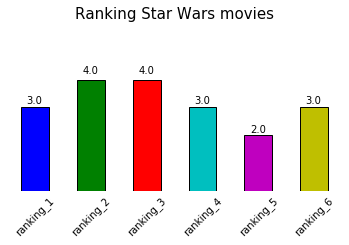

In [ ]:
fig, ax = plt.subplots(figsize=(6,3))
ax = ranking_mean.plot(kind='bar')
for p in ax.patches:
    if p.get_height() >= 0.2:
        ax.annotate(str(round(p.get_height(),2)), (p.get_x()+0.1, p.get_height()*1.05))
ax.set_ylim(0,6)
for spine in ax.spines:
    ax.spines[spine].set_visible(False)
ax.tick_params(bottom=False, top=False, left=False, right=False,labelleft=False)
ax.set_title('Ranking Star Wars movies',fontsize=15)
ax.set_xticklabels(ranking_mean.index,rotation=45)
plt.show()

Remembering that 1 means the film was the most favorite, and 6 means it was the least favorite and:

- Ranking 1 Episode I: The Phantom Menace (1999)
- Ranking 2 Episode II: Attack of the Clones (2002)
- Ranking 3 Episode III: Revenge of the Sith (2005)
- Ranking 4 Episode IV: A New Hope (1977)
- Ranking 5 Episode V: The Empire Strikes Back (1980)
- Ranking 6 Episode VI: The Return of the Jedi (1983)

Respect to the Episode I,II,III,IV and VI on average the people surveyed have this movies in a half ranking where Episode I,IV and VI are in the group of more favorites films and Episode II and III are in the group of less favorites films. On Average the surveyed considered that Episode V is the most favorite film.

On rotten tomatoes I found that the Episode V: The Empire Strikes Back (1980) is the [Highest Rated Movie of the Star Wars Saga](https://www.rottentomatoes.com/franchise/star_wars_saga)

> **Critics Consensus**: "Dark, sinister, but ultimately even more involving than A New Hope, The Empire Strikes Back defies viewer expectations and takes the series to heightened emotional levels." 

## Movies seen

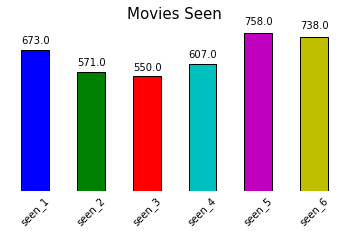

In [ ]:
fig2, ax2 = plt.subplots(figsize=(6,3))
ax2 = star_wars_clean[star_wars_clean.columns[3:9]].sum().plot(kind='bar')
for p in ax2.patches:
    if p.get_height() >= 0.2:
        ax2.annotate(str(round(p.get_height(),2)), (p.get_x()+0, p.get_height()*1.05))
for spine in ax2.spines:
    ax2.spines[spine].set_visible(False)
ax2.tick_params(bottom=False, top=False, left=False, right=False,labelleft=False)
ax2.set_title('Movies Seen',fontsize=15)
ax2.set_xticklabels(star_wars_clean.columns[3:9],rotation=45)
plt.show()

Of the first six movies of the Star Wars Saga the movie most seen for the surveyed is the **Episode V: The Empire Strikes Back (1980)** and less seen the **Episode III: Revenge of the Sith (2005).**

## Movies ranking by Gender

549 surveyed are Females and 497 are Males

In [ ]:
star_wars_clean['Gender'].value_counts(dropna=True)

Female    549
Male      497
Name: Gender, dtype: int64

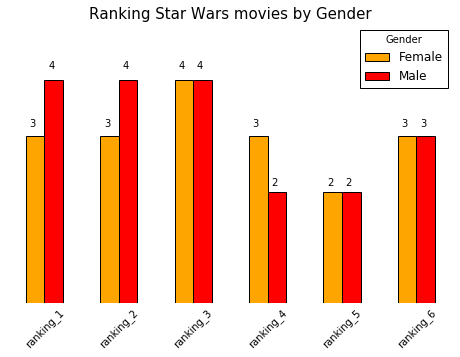

In [ ]:
gender_rank = star_wars_clean.pivot_table(values = star_wars_clean.columns[9:15], index = 'Gender',margins=False).applymap(lambda x: int(x))
ax3 = gender_rank.transpose().plot(kind='bar',figsize=(8,5),color=['orange','red'])
for p in ax3.patches:
    if p.get_height() >= 0.2:
        ax3.annotate(str(int(p.get_height())), (p.get_x()+0.05, p.get_height()*1.05))
ax3.set_ylim(0,5)
for spine in ax3.spines:
    ax3.spines[spine].set_visible(False)
ax3.tick_params(bottom=False, top=False, left=False, right=False,labelleft=False)
ax3.set_title('Ranking Star Wars movies by Gender',fontsize=15)
ax3.set_xticklabels(star_wars_clean.columns[9:15],rotation=45)
plt.show()

Respect Females, on average the Episodes I,II,III,IV and VI are in a half of the favorite ranking. Respect Males, on average the Episodes I,II,III and VI are in a half of the favorite ranking. So much  Females as to Males they think that Episode V is the most favorite film. The "Episode IV: A New Hope (1977)" for the Males also is one of the most favorite films.

## Movies seen by Gender

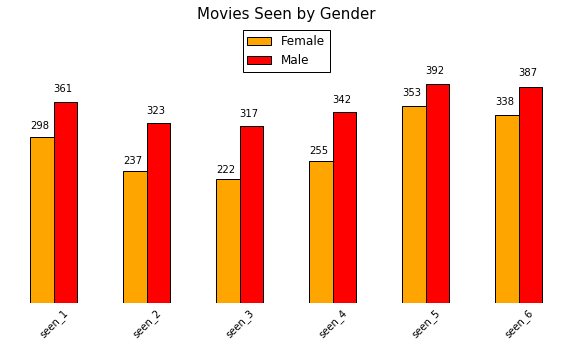

In [ ]:
gender_seen = star_wars_clean.pivot_table(values = star_wars_clean.columns[3:9], index = 'Gender',aggfunc = np.sum,margins=False).applymap(lambda x: int(x))
ax4 = gender_seen.transpose().plot(kind='bar',figsize=(10,5),color=['orange','red'])
for p in ax4.patches:
    if p.get_height() >= 0.2:
        ax4.annotate(str(int(p.get_height())), (p.get_x(), p.get_height()*1.05))
ax4.set_ylim(0,500)
for spine in ax4.spines:
    ax4.spines[spine].set_visible(False)
ax4.tick_params(bottom=False, top=False, left=False, right=False,labelleft=False)
ax4.set_title('Movies Seen by Gender',fontsize=15)
ax4.set_xticklabels(star_wars_clean.columns[3:9],rotation=45)
ax4.legend(loc='upper center')
plt.show()

For both men and women movie most seen for they is the **"Episode V: The Empire Strikes Back (1980)"** and less seen the **"Episode III: Revenge of the Sith (2005)"**

# Conclusion

Is probable that the "Episode V: The Empire Strikes Back (1980)" be the best movie of the first two trilogies of the Stars Wars. With more  tools of descriptive and inferential statistic we could guarantee this affirmation.

